<a href="https://colab.research.google.com/github/jane95924/WEEK_13_IP/blob/master/WEEK_13_IP_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNSUPERVISED LEARNING WITH R.

1. Research Question



> Our task is to identify characteristics of customer groups for brand sales and marketing team of Kira Plastinina. The characteristics will help us classify if the customer will earn the company revenue or not.


2. Metrics of success


> Our analysis will be successful if we can accurately classify customer behaviour. Getting more than half the data correctly classified is a success for our analysis.



3. The Context

> Kira Plastinina is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines and Armenia. Plastinina was born in Moscow. Throughout her career, Plastinina has presented her fashion collections during Rome, Milan, New York and Moscow fashion weeks. Her brand has been worn by many celebrities including Paris Hilton, Lindsay Lohan, Georgia May Jagger, Karlie Kloss, Rowan Blanchard, Lyndsy Fonseca, Victoria Justice, and many others.
Key to a successful business is learning your customers, understanding what they need and their behavior in general. Consumer behavior is usually very complex because each one has a different attitude towards purchase, consumption and disposal of a product.
This is of huge importance to managers because the focus on consumers is the key contributor to the marketing of business practice. By understanding customer behaviour, a company would be able to forge bonds and build emotional relationships with their customers, which is extremely crucial to gain customer loyalty, brand advocacy and referrals. The customer is perhaps the most important part of any business, since without them there would be no business.


4. Experimental design



*   Load our dataset and preview Exploratory analysis. 
*   Data cleaning, check for missing data, outliers ,duplicates and deal with them

*   Univariate analysis 
*   Bivariate analysis and Multivariate analysis
*   K-Means Clustering
*   Hierarchical Clustering






5. Appropriateness of data

>Our dataset contains 12330 rows and 18columns. 10 columns are numerical datatype and 8 are factor. Our class/target variable is 'Revenue'. An explanation of the columns is provided on canvas, this makes our analysis easier.
The columns given can help us answer our research questions,they are relevant to our question.

In [ ]:
#read the oploaded dataset
data<-read.csv('/content/online_shoppers_intention.csv')
#Preview the head
head(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [ ]:
#Preview the tail
tail(data)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


##Initial Data Exploration

In [ ]:
#check the dimension of our dataset
dim(data)

[1] 12330    18

Our dataset has a total of 12330 rows and 18 columns.

In [ ]:
#Let us check the data types.
sapply(data,class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"                "factor"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
               "factor"               "logical"               "logical"

In [ ]:
#Check the structure of our dataset
str(data)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

The dataset consists of 10 numerical and 8 categorical attributes.

 The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 

The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [ ]:
#We can also check the summary of our data
summary(data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

##Data Cleaning

In [ ]:
#checking for null values
colSums(is.na(data))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We have some rows with null values. 14 rows of 12330 rows is a very small number and we can drop them

In [ ]:
#Dealing with missing values
data <- na.omit(data)

In [ ]:
#checking if we did drop the null values
colSums(is.na(data))


Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We dropped the null values.

In [ ]:
#We check if we do have any duplicates in our dataset
anyDuplicated(data)

[1] 159

We have 159 duplicates in our dataset.we are going to remove them to avoid redundancy



In [ ]:
# removing duplicates
data <- unique(data)
#we preview our dataset to ensure we have alot of data
dim(data)

[1] 12199    18

Checking for outliers

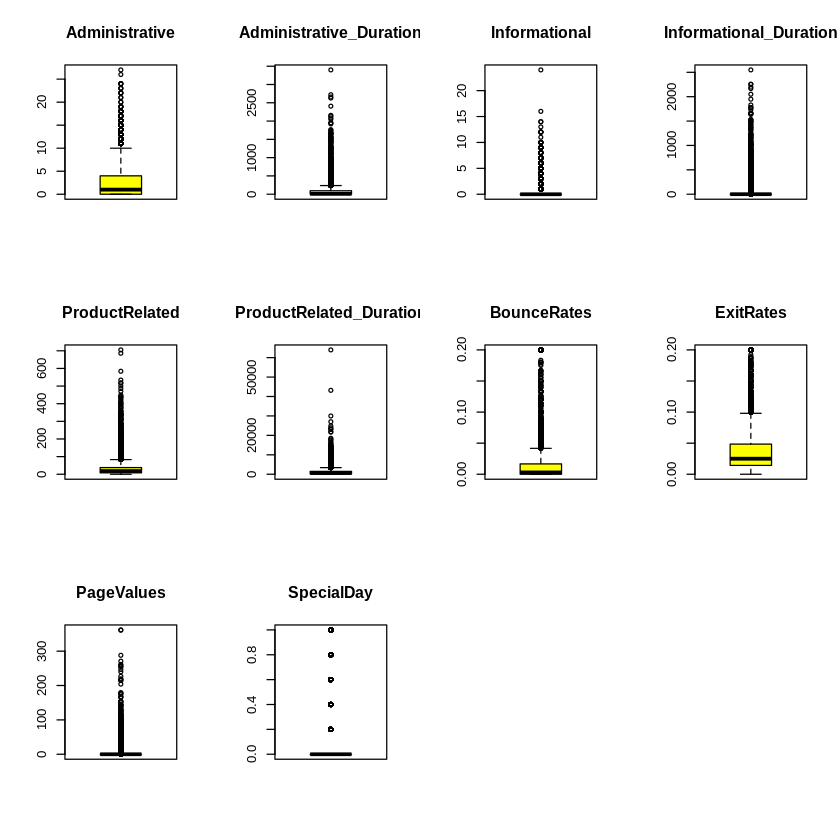

In [ ]:
# Creating separate boxplots for each attribute
par(mfrow=c(3,4))
for(i in 1:10) {
	boxplot(data[,i], main=names(data)[i], col = "yellow")}

From our analysis, we can see that all our numerical columns have outliers. we are not going to deal with them since they represent the real world.

##EDA

UNIVARIATE ANALYSIS.

1. Measure of central tendency and dispersion.

In [ ]:
#We get the summary
summary(data)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

The mean,median, quantiles of our numerical variables are as seen above.

In [ ]:
#We do not have an inbuilt method to get the mode, we are going to use the function in getting the 
#mode of our variables
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

1.Administrative.

In [ ]:
install.packages('propagate')
library(propagate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘sandwich’, ‘mvtnorm’, ‘gmm’, ‘bit’, ‘tmvtnorm’, ‘ff’, ‘minpack.lm’


Loading required package: MASS

Loading required package: tmvtnorm

Loading required package: mvtnorm

Loading required package: Matrix

Loading required package: stats4

Loading required package: gmm

Loading required package: sandwich

Loading required package: Rcpp

Loading required package: ff

Loading required package: bit


Attaching package: ‘bit’


The following object is masked from ‘package:base’:

    xor


Attaching package ff

- getOption("fftempdir")=="/tmp/Rtmpy6mEAE/ff"


- getOption("ffextension")=="ff"


- getOption("ffdrop")==TRUE


- getOption("fffinonexit")==TRUE


- getOption("ffpagesize")==65536


- getOption("ffcaching")=="mmnoflush"  -- consider "ffeachflush" if your system stalls on large writes


- getOption("ffbatchbytes")==16777216 -- consider a different value for tu

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Administrative))
#We get the variance
paste("Variance:",var(data$Administrative))
#We check the standard deviation
paste('Std dev:',sd(data$Administrative))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Administrative))
#Check skewness
paste('Skewness:',skewness(data$Administrative))

[1] "mode: 0"

[1] "Variance: 11.094569961512"

[1] "Std dev: 3.33085123677297"

[1] "Kurtosis: 4.63610560181255"

[1] "Skewness: 1.94624798882751"

Administrative is positively skewed and has a positive kurtosis, this mean that the distribution is peaked and possess and a thick tail.
The standard deviation is 3.3, this is the dispersion from the mean.

2. Administrative duration

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Administrative_Duration))
#We get the variance
paste("Variance:",var(data$Administrative_Duration))
#We check the standard deviation
paste('Std dev:',sd(data$Administrative_Duration))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Administrative_Duration))
#Check skewness
paste('Skewness:',skewness(data$Administrative_Duration))

[1] "mode: 0"

[1] "Variance: 31516.2503598087"

[1] "Std dev: 177.528167792632"

[1] "Kurtosis: 50.0938854307673"

[1] "Skewness: 5.59020999753289"

Administration duration has really large standard deviation and a mode of 0.

The kurtosis and skewness is positive.

3. Informational

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Informational))
#We get the variance
paste("Variance:",var(data$Informational))
#We check the standard deviation
paste('Std dev:',sd(data$Informational))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Informational))
#Check skewness
paste('Skewness:',skewness(data$Informational))

[1] "mode: 0"

[1] "Variance: 1.62770968099237"

[1] "Std dev: 1.27581726003075"

[1] "Kurtosis: 26.6425397999364"

[1] "Skewness: 4.01345146809253"

Informational has mode 0, a small standard deviation of 1.

It is positively skewed and has a positive kurtosis.

4. Informational duration

In [ ]:
#Check the mode 
paste("mode:",getmode(data$Informational_Duration))
#We get the variance
paste("Variance:",var(data$Informational_Duration))
#We check the standard deviation
paste('Std dev:',sd(data$Informational_Duration))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$Informational_Duration))
#Check skewness
paste('Skewness:',skewness(data$Informational_Duration))

[1] "mode: 0"

[1] "Variance: 20010.5068641882"

[1] "Std dev: 141.458498734393"

[1] "Kurtosis: 75.4640881385948"

[1] "Skewness: 7.5374346580435"

Informational duration has really large variance and standard deviation.

The kurtosis and skewness are positive.

It has a mode of zero.

5. Product related

In [ ]:
#Check the mode 
paste("mode:",getmode(data$ProductRelated))
#We get the variance
paste("Variance:",var(data$ProductRelated))
#We check the standard deviation
paste('Std dev:',sd(data$ProductRelated))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$ProductRelated))
#Check skewness
paste('Skewness:',skewness(data$ProductRelated))

[1] "mode: 1"

[1] "Variance: 1989.24129586768"

[1] "Std dev: 44.6009113793394"

[1] "Kurtosis: 31.0490272529918"

[1] "Skewness: 4.33213391143715"

Product related has a mode of 1.

it has a really high variance annd standard deviation.

it is positively skewed and has a positive kurtosis.

6. Product related duration

In [ ]:
#Check the mode 
paste("mode:",getmode(data$ProductRelated_Duration))
#We get the variance
paste("Variance:",var(data$ProductRelated_Duration))
#We check the standard deviation
paste('Std dev:',sd(data$ProductRelated_Duration))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$ProductRelated_Duration))
#Check skewness
paste('Skewness:',skewness(data$ProductRelated_Duration))

[1] "mode: 0"

[1] "Variance: 3686121.49674345"

[1] "Std dev: 1919.92747174039"

[1] "Kurtosis: 136.590791574332"

[1] "Skewness: 7.25140328756752"

The product related duration has a high variance and standard deviation, it is positively skewed and has a positive kurtosis.

7. Bouncerates

In [ ]:
#Check the mode 
paste("mode:",getmode(data$BounceRates))
#We get the variance
paste("Variance:",var(data$BounceRates))
#We check the standard deviation
paste('Std dev:',sd(data$BounceRates))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$BounceRates))
#Check skewness
paste('Skewness:',skewness(data$BounceRates))

[1] "mode: 0"

[1] "Variance: 0.0020613872549165"

[1] "Std dev: 0.0454025027384669"

[1] "Kurtosis: 9.25506414129333"

[1] "Skewness: 3.15287400481826"

8. Exit rates

In [ ]:
#Check the mode 
paste("mode:",getmode(data$ExitRates))
#We get the variance
paste("Variance:",var(data$ExitRates))
#We check the standard deviation
paste('Std dev:',sd(data$ExitRates))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$ExitRates))
#Check skewness
paste('Skewness:',skewness(data$ExitRates))

[1] "mode: 0.2"

[1] "Variance: 0.00213879984993362"

[1] "Std dev: 0.046247160452655"

[1] "Kurtosis: 4.62425246562826"

[1] "Skewness: 2.23312525316011"

9. Page values

In [ ]:
#Check the mode 
paste("mode:",getmode(data$PageValues))
#We get the variance
paste("Variance:",var(data$PageValues))
#We check the standard deviation
paste('Std dev:',sd(data$PageValues))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$PageValues))
#Check skewness
paste('Skewness:',skewness(data$PageValues))

[1] "mode: 0"

[1] "Variance: 348.113183761479"

[1] "Std dev: 18.6577915027872"

[1] "Kurtosis: 64.9403073119719"

[1] "Skewness: 6.34866297893388"

10. Special day

In [ ]:
#Check the mode 
paste("mode:",getmode(data$SpecialDay))
#We get the variance
paste("Variance:",var(data$SpecialDay))
#We check the standard deviation
paste('Std dev:',sd(data$SpecialDay))
#we check the kurtosis
paste('Kurtosis:',kurtosis(data$SpecialDay))
#Check skewness
paste('Skewness:',skewness(data$SpecialDay))

[1] "mode: 0"

[1] "Variance: 0.0398843209243294"

[1] "Std dev: 0.199710592919678"

[1] "Kurtosis: 9.78605382000955"

[1] "Skewness: 3.28448060942411"

Visualization.

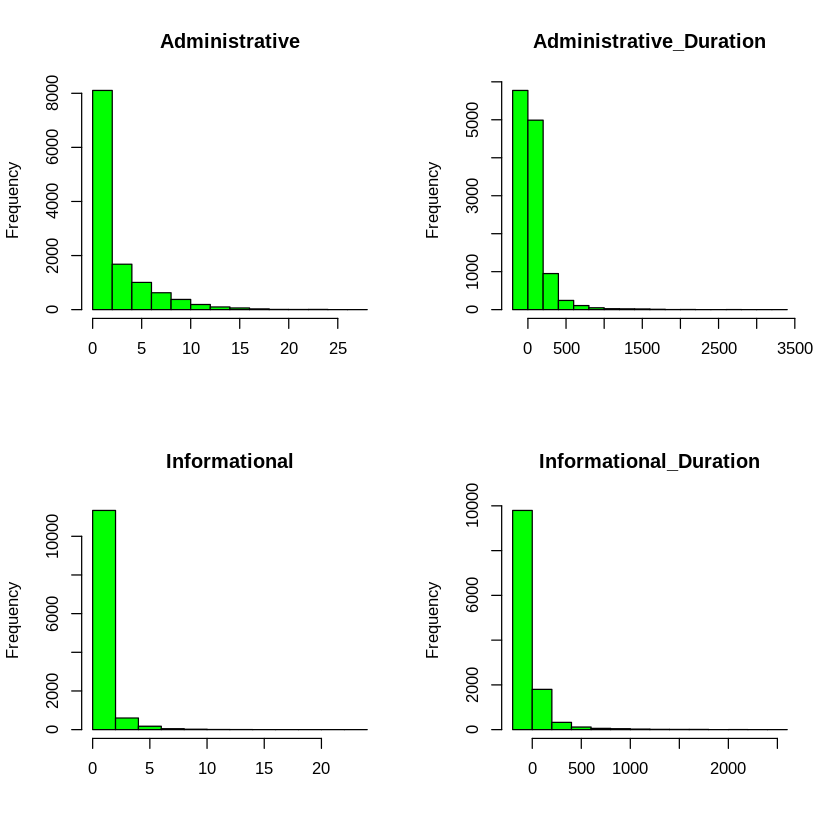

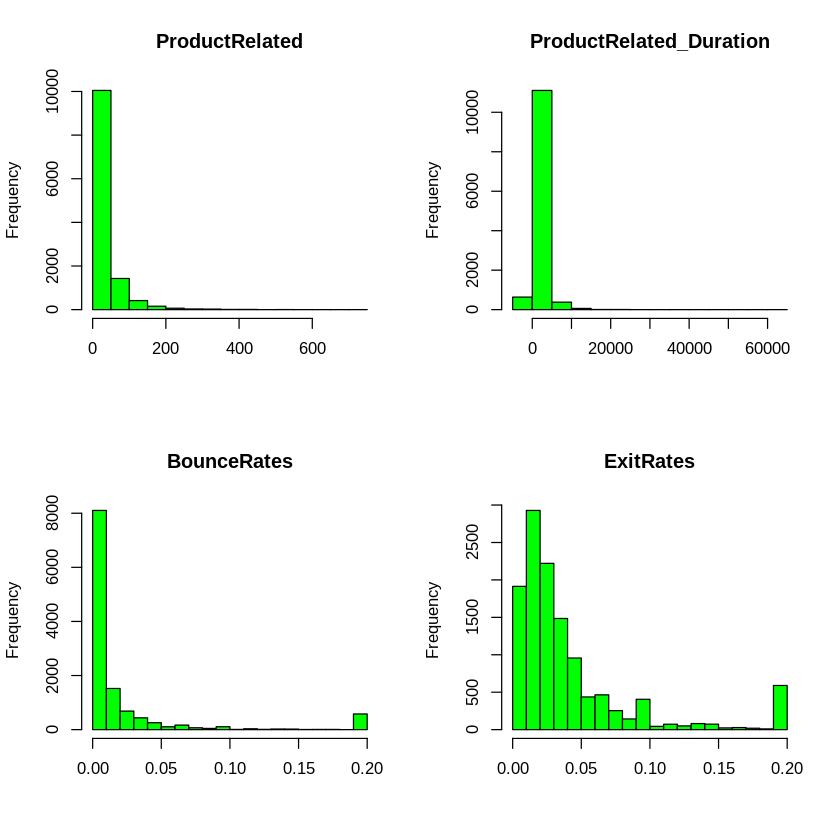

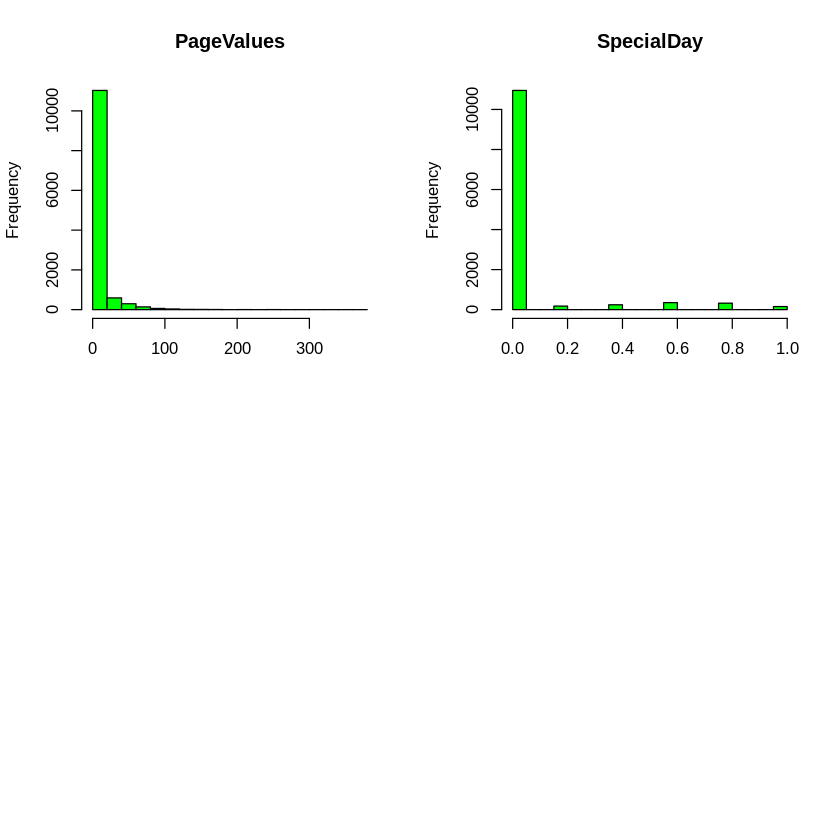

In [ ]:
# previewing the numerical variables' histograms 
par(mfrow=c(2,2))
for(i in 1:10) {
    hist(data[, i], main=names(data)[i],col='green', xlab = NULL)
}

Most of our numerical variables are positively skewed.

Categorical columns.

In [ ]:
# create tables of all categorical variables to be able to create bar plots with them
month_table <- table(data$Month)
operatingsystem_table <- table(data$OperatingSystems)
browser_table <- table(data$Browser)
region_table <- table(data$Region)
traffictype_table <- table(data$TrafficType)
visitortype_table <- table(data$VisitorType)
weekend_table <- table(data$Weekend)
revenue_table <- table(data$Revenue)

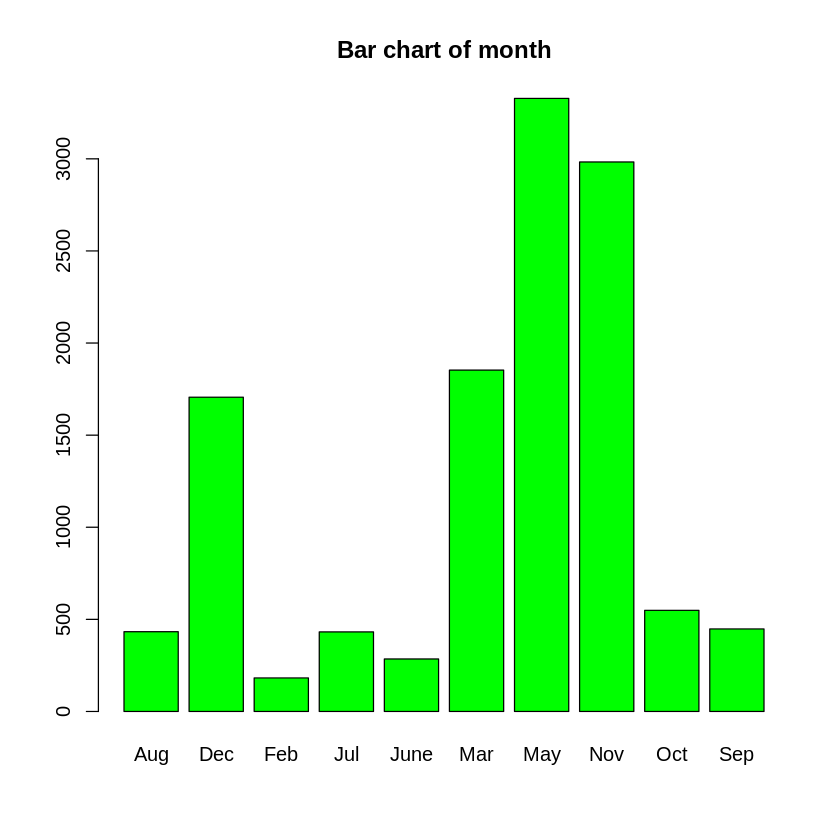

In [ ]:
#plotting bar chart showing month frequency
par(mfrow=c(1,1))
barplot((month_table), col = "green", main = "Bar chart of month")

Most visiting happened in the month of may.February is the month with the last frequencies.

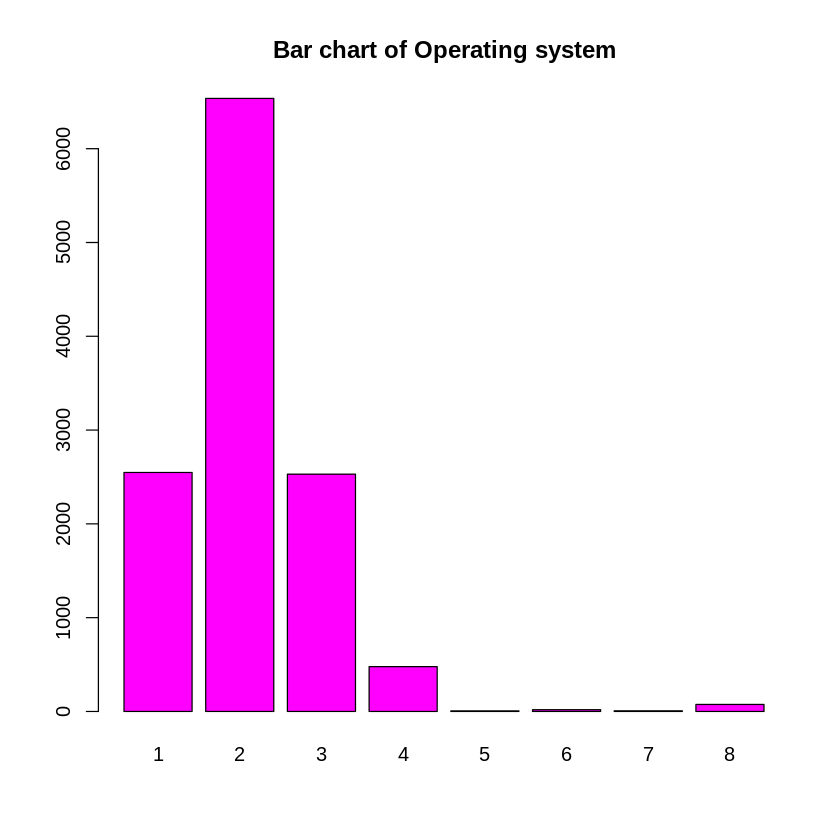

In [ ]:
#plotting bar chart showing the operating system frequency. 
par(mfrow=c(1,1))
barplot((operatingsystem_table), col = "magenta", main = "Bar chart of Operating system")

The second operating system has the highest frequency

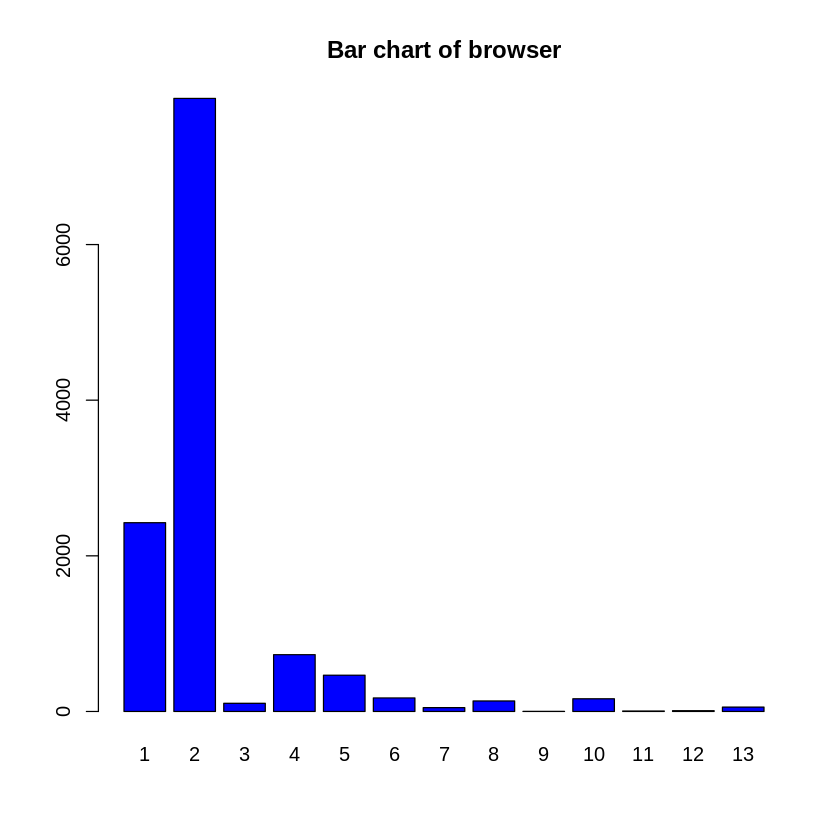

In [ ]:
#plotting bar chart showing the browser frequency.
par(mfrow=c(1,1))
barplot((browser_table), col = "blue", main = "Bar chart of browser")

Browser 2 has the highest frequency  and 9,10 ,11 have the least.

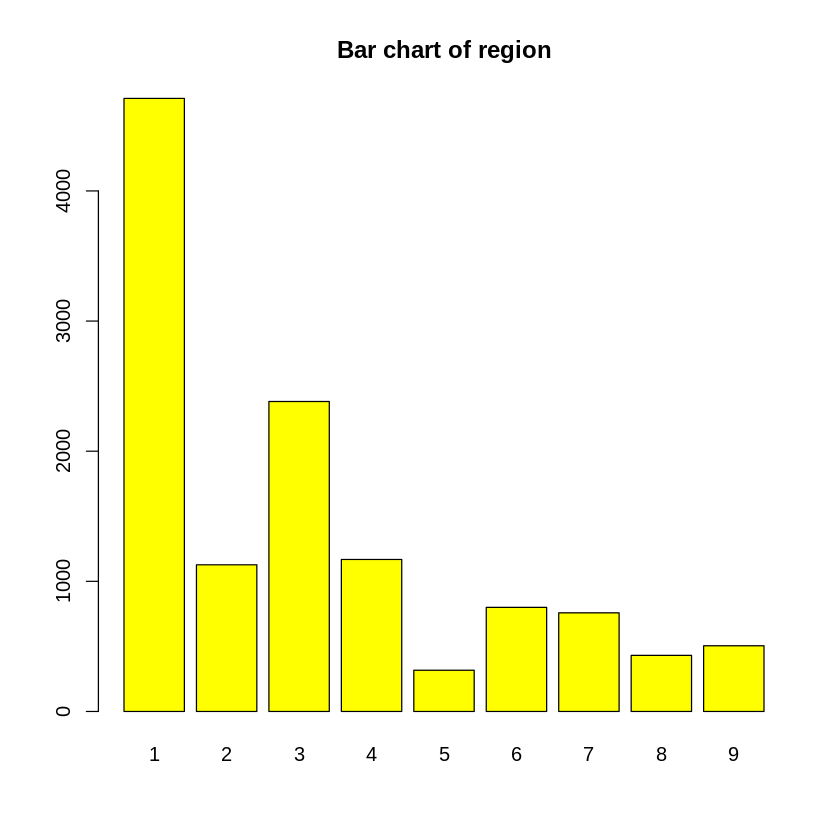

In [ ]:
#plotting bar chart  showing the region frequency.
par(mfrow=c(1,1))
barplot((region_table), col = "yellow", main = "Bar chart of region")

Region 1 has the highest frequency.

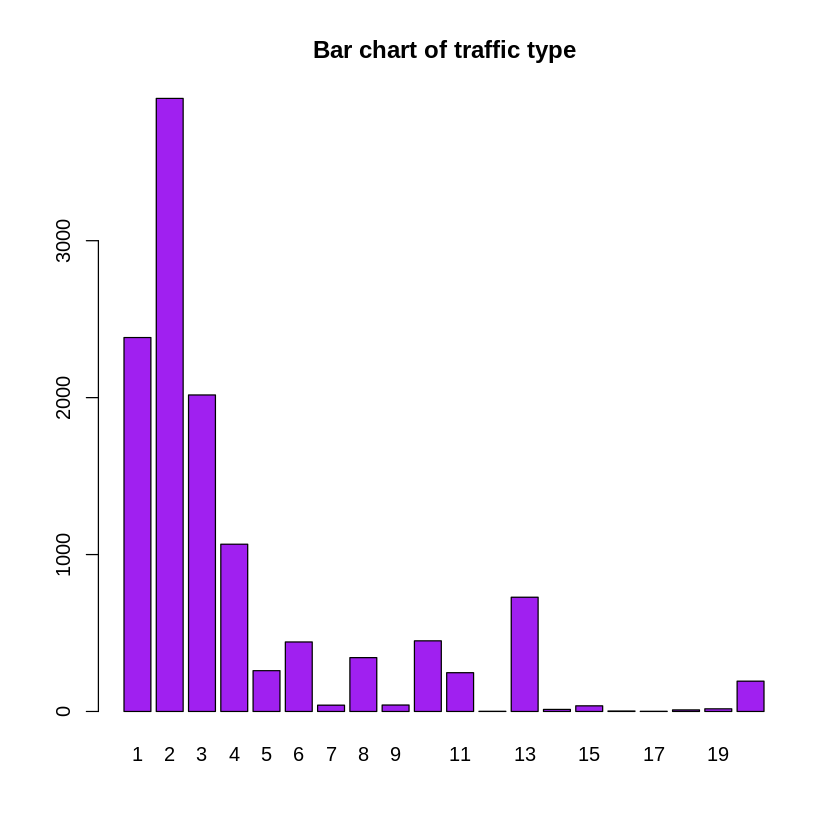

In [ ]:
#plotting bar chart showing traffic type frequency.
par(mfrow=c(1,1))
barplot((traffictype_table), col = "purple", main = "Bar chart of traffic type")

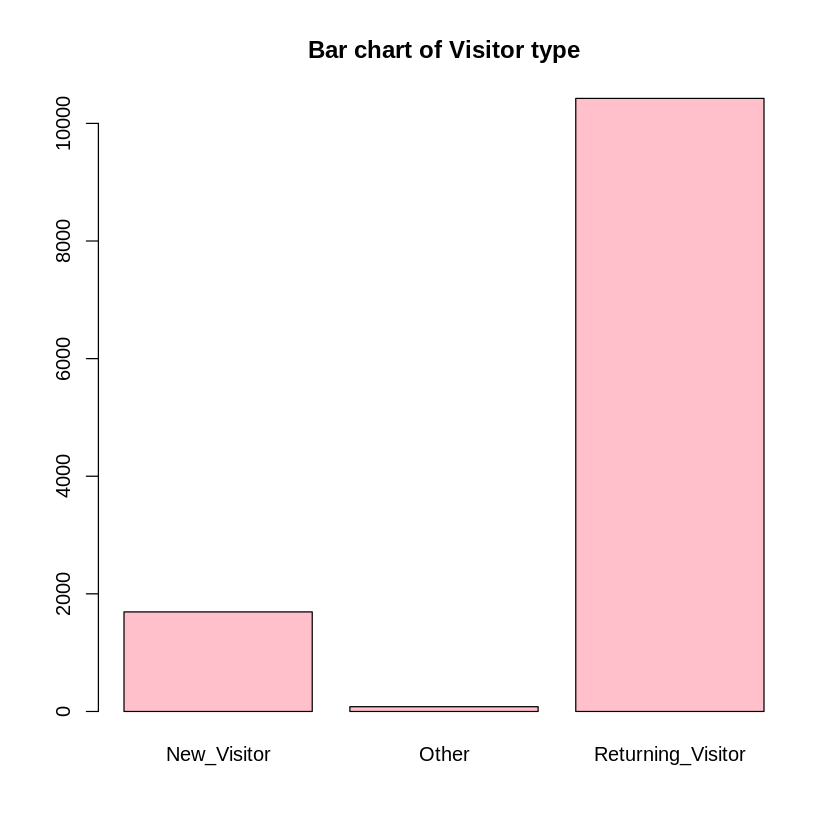

In [ ]:
#plotting bar chart showing the frequency of the visitor type. 
par(mfrow=c(1,1))
barplot((visitortype_table), col = "pink", main = "Bar chart of Visitor type")

Most of the individuals are returning visitors, they are not new to the business.

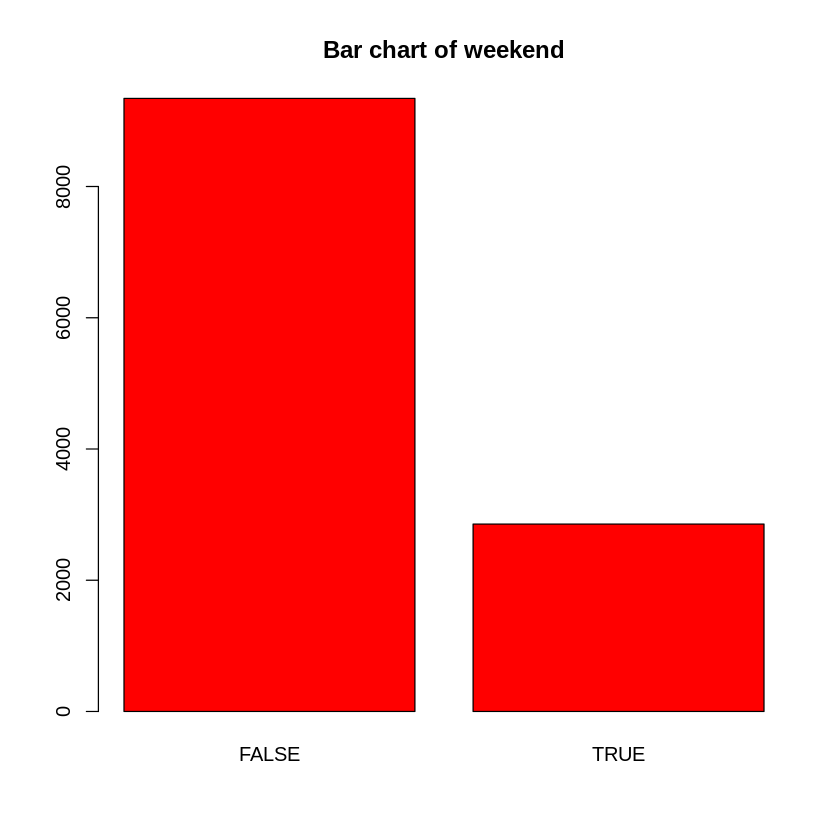

In [ ]:
#plotting bar chart showing the weekend frequency. 
par(mfrow=c(1,1))
barplot((weekend_table), col = "red", main = "Bar chart of weekend")

Weekdays had a high frequency than the weekends in the dataset. This could be because weekdays are working days and someone would rest over the weekend,having their alone or family time.

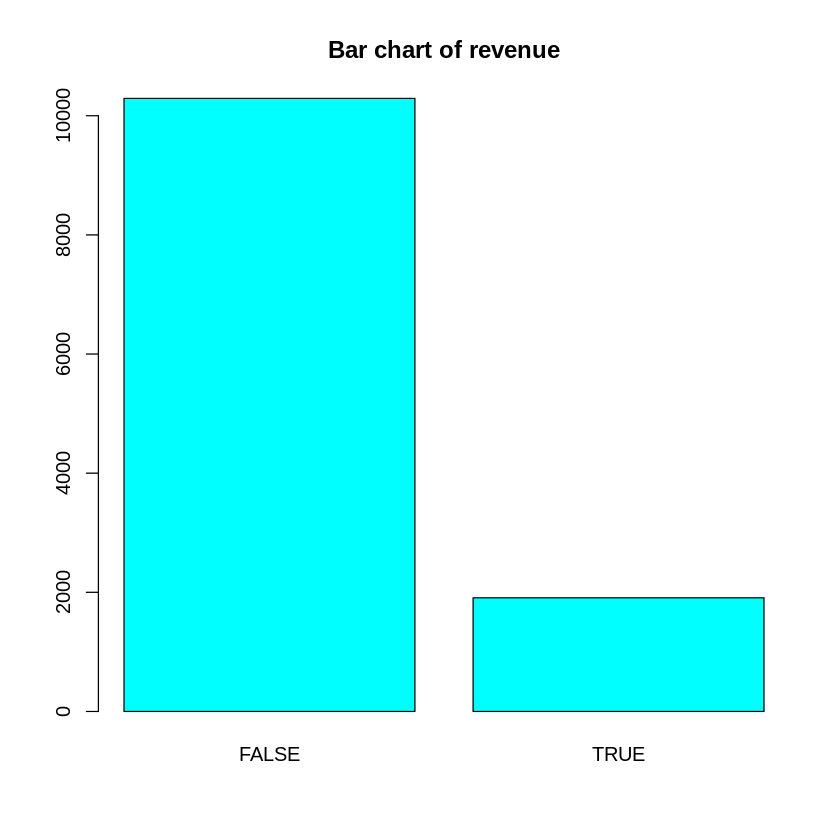

In [ ]:
#plotting bar chart of revenue.
par(mfrow=c(1,1))
barplot((revenue_table), col = "cyan", main = "Bar chart of revenue")

Bivariate analysis and multivariate analysis.

In [ ]:
install.packages('ggplot2')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



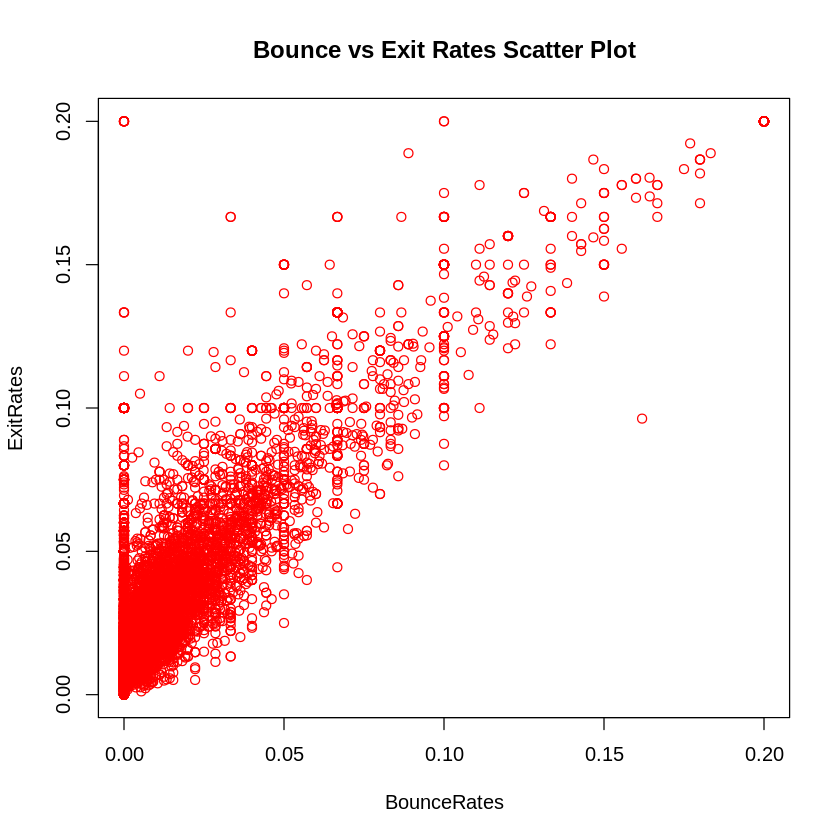

In [ ]:
# Plotting a scatter plot using the plot() method
plot(ExitRates ~ BounceRates, dat = data, 
      col = "red",
      main = "Bounce vs Exit Rates Scatter Plot")

Exit rates and bounce rates have a strong linear relation.

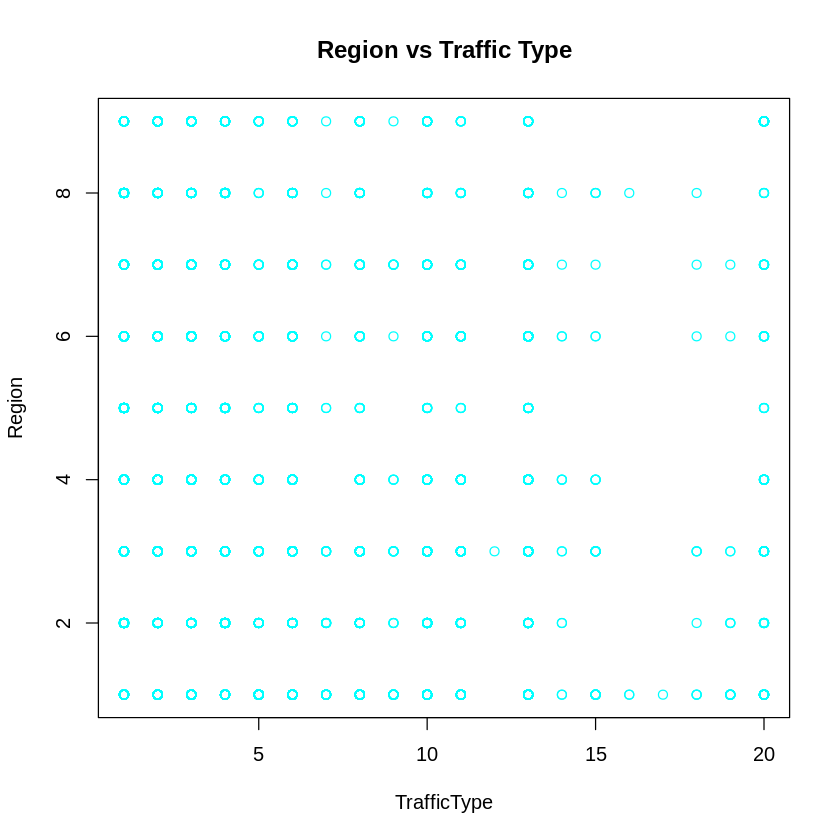

In [ ]:
#plot the region vs the traffic type
plot(Region ~ TrafficType, dat = data, 
      col = "cyan",
      main = "Region vs Traffic Type")

Traffic type and region has no linear relation

`geom_smooth()` using formula 'y ~ x'



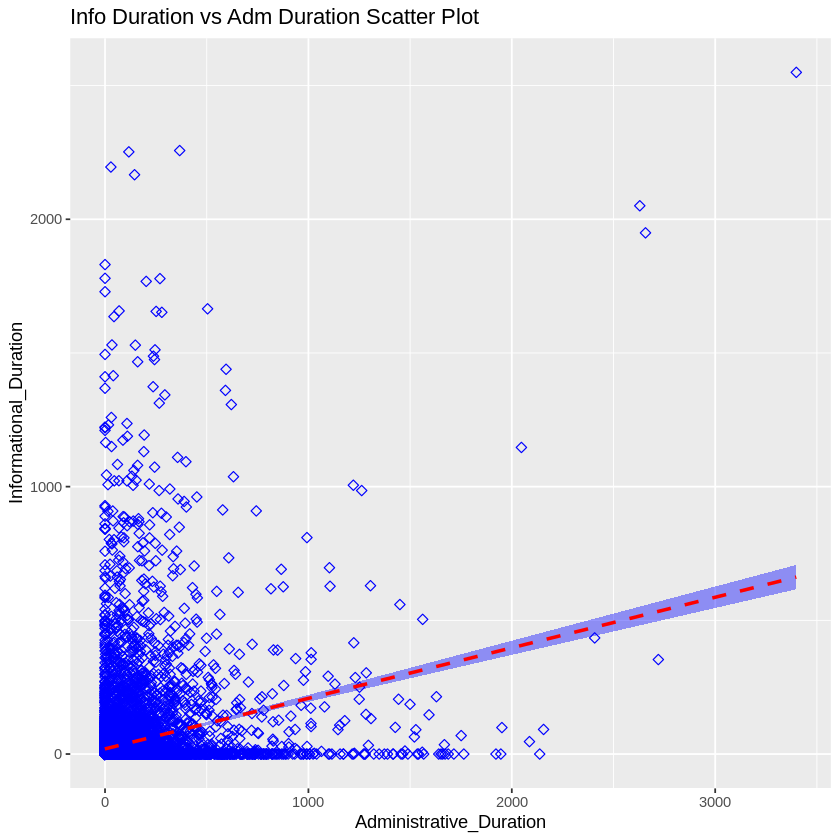

In [ ]:
# Scatter plot using ggplots and fitting a line of best fit
ggplot(data, aes(x = Administrative_Duration, y = Informational_Duration)) + 
        geom_point(size = 2, color= "blue", shape = 23)+ 
        geom_smooth(method=lm,  linetype="dashed",color="red", fill="blue")+
        labs(title = "Info Duration vs Adm Duration Scatter Plot")

Information duration and administration duration have no linear relation.

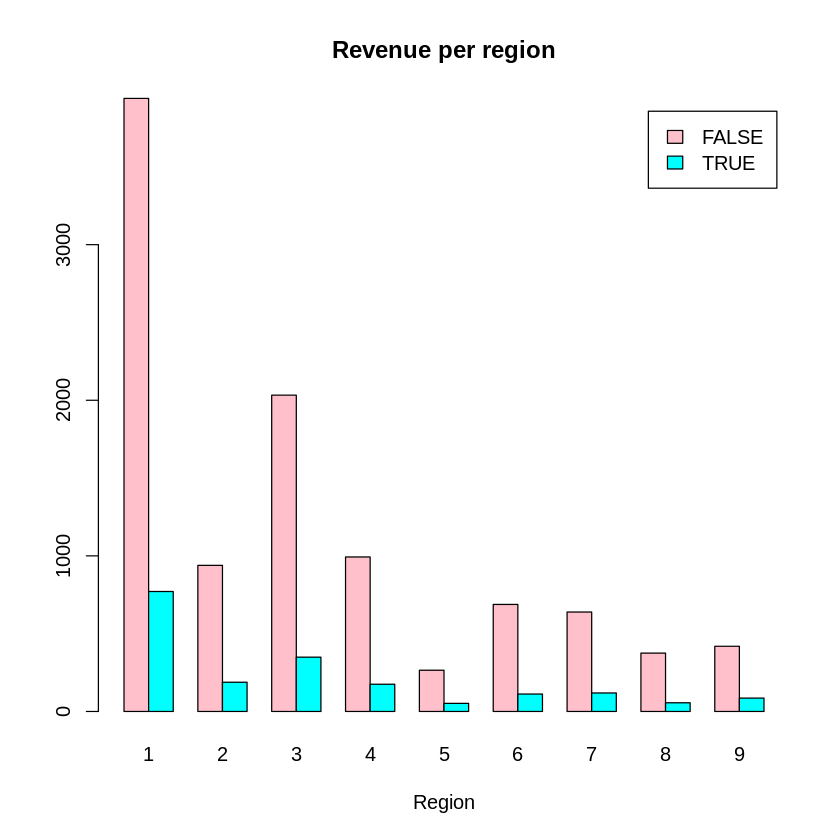

In [ ]:
#barplot to show relationship between the revenue earned and the region
 revperregion<- table(data$Revenue, data$Region)
barplot(revperregion, main = "Revenue per region", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(revperregion), xlab = "Region")

Region 1 earned the highest revenue compared to the other regions.

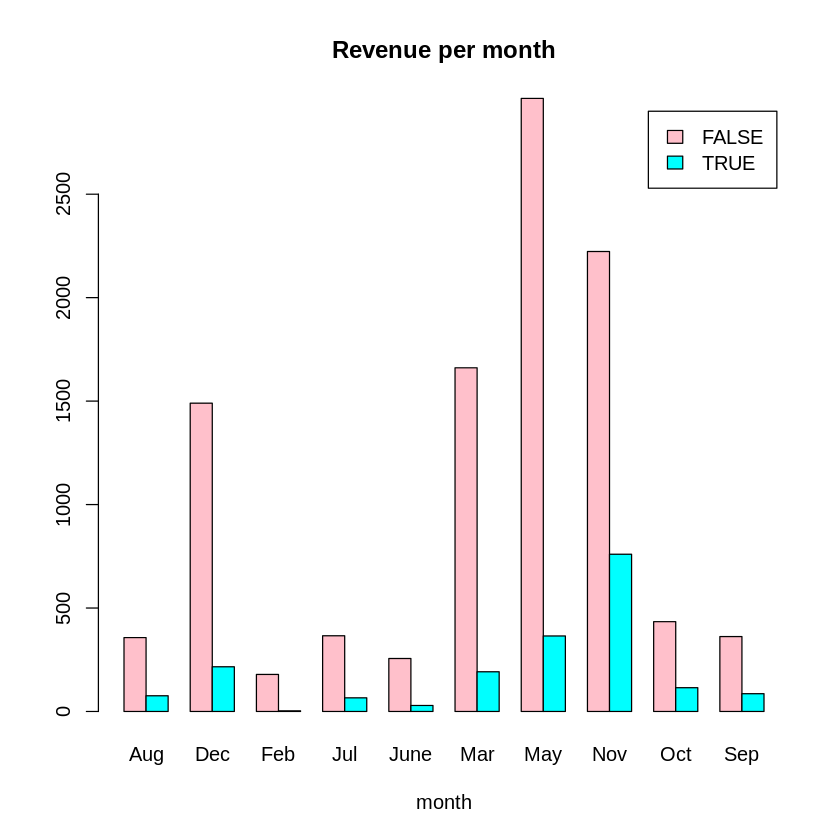

In [ ]:
#Revenue per month
month_table <- table(data$Revenue, data$Month)
barplot(month_table, main = "Revenue per month", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(month_table), xlab = "month")


November earned the highest revenue followed by may.

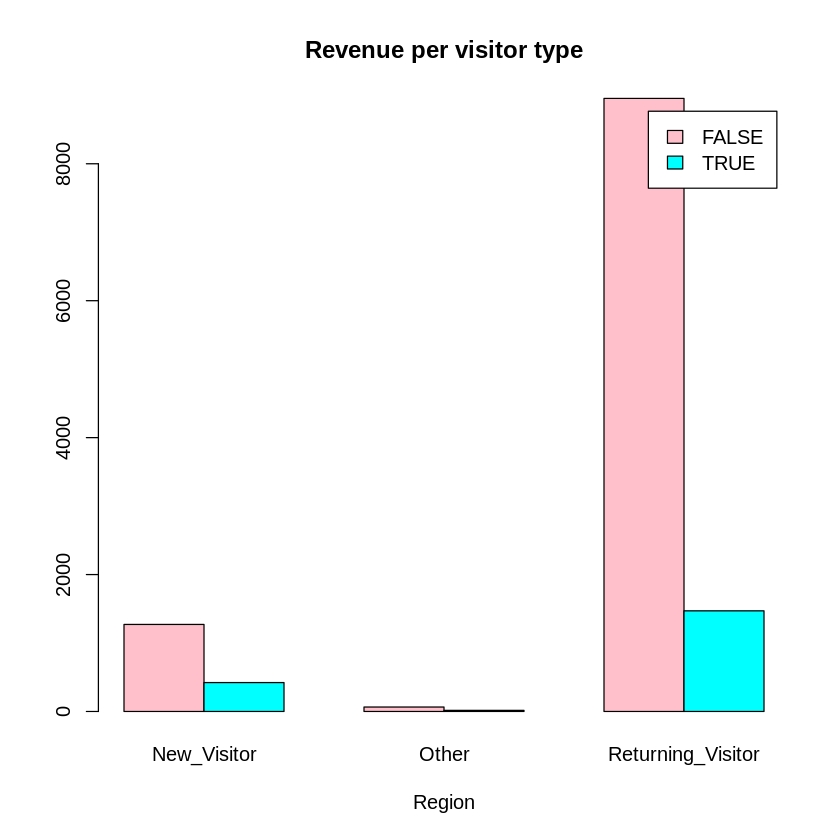

In [ ]:
#revenue vs the visitor type
 rev_visitor<- table(data$Revenue, data$VisitorType)
barplot(rev_visitor, main = "Revenue per visitor type", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_visitor), xlab = "Region")

Most revenue earned was from returning visitors, others returned the least revenue.

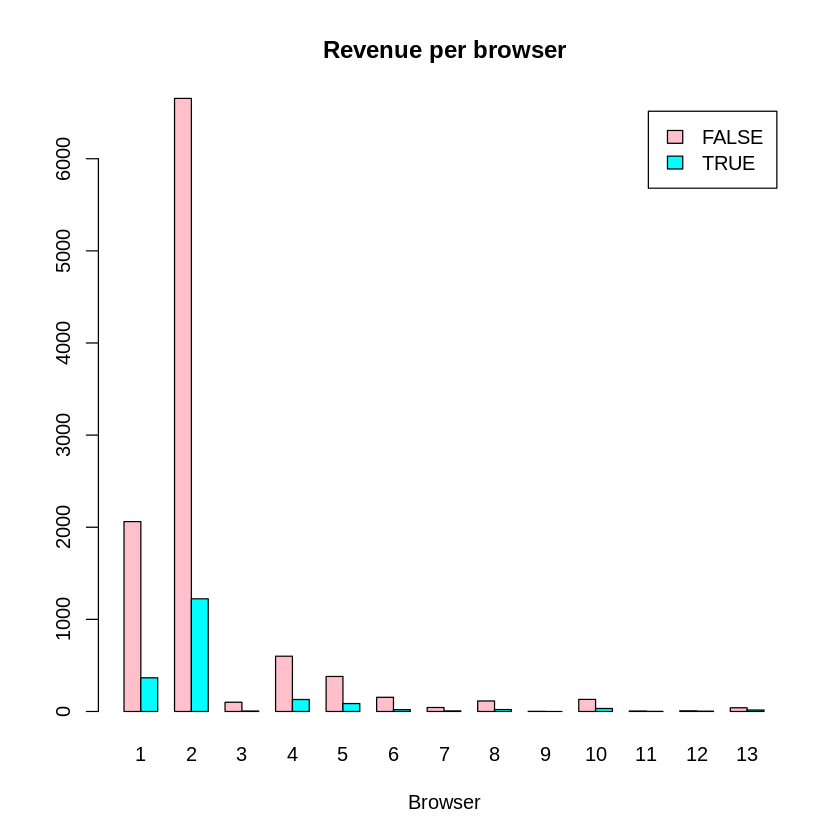

In [ ]:
#revenue vs browser
 rev_browser<- table(data$Revenue, data$Browser)
barplot(rev_browser, main = "Revenue per browser", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_browser), xlab = "Browser")

Browser 2 earned the company highest revenue, then browser 1.

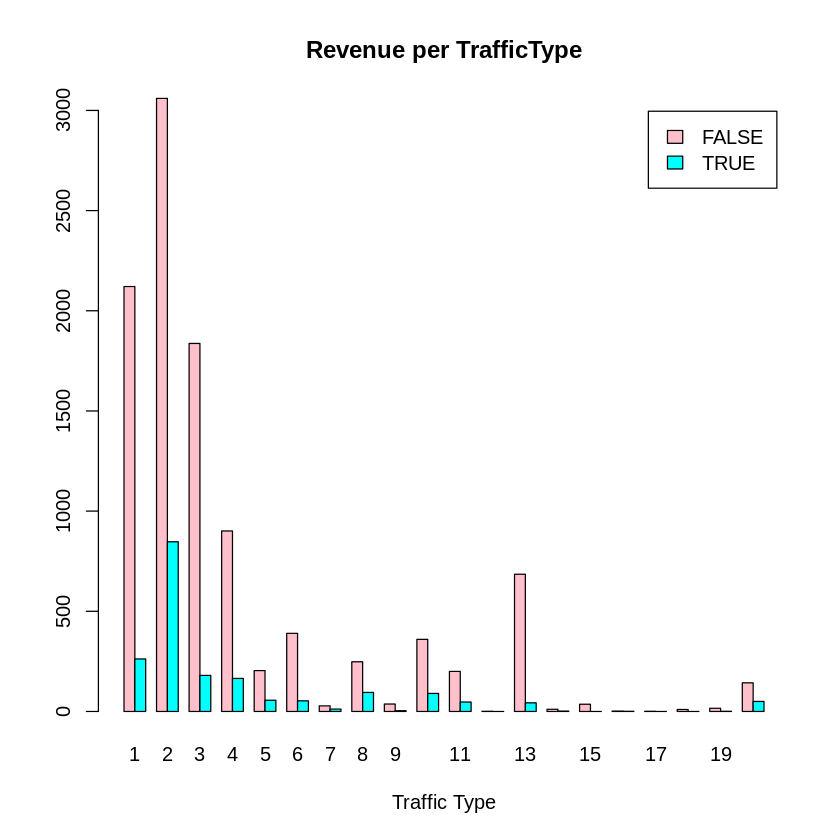

In [ ]:
#revenue vs TrafficType
 rev_traffictype<- table(data$Revenue, data$TrafficType)
barplot(rev_traffictype, main = "Revenue per TrafficType", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_traffictype), xlab = "Traffic Type")

Traffic Type 2 earned higher revenue, followed by traffic type 1.

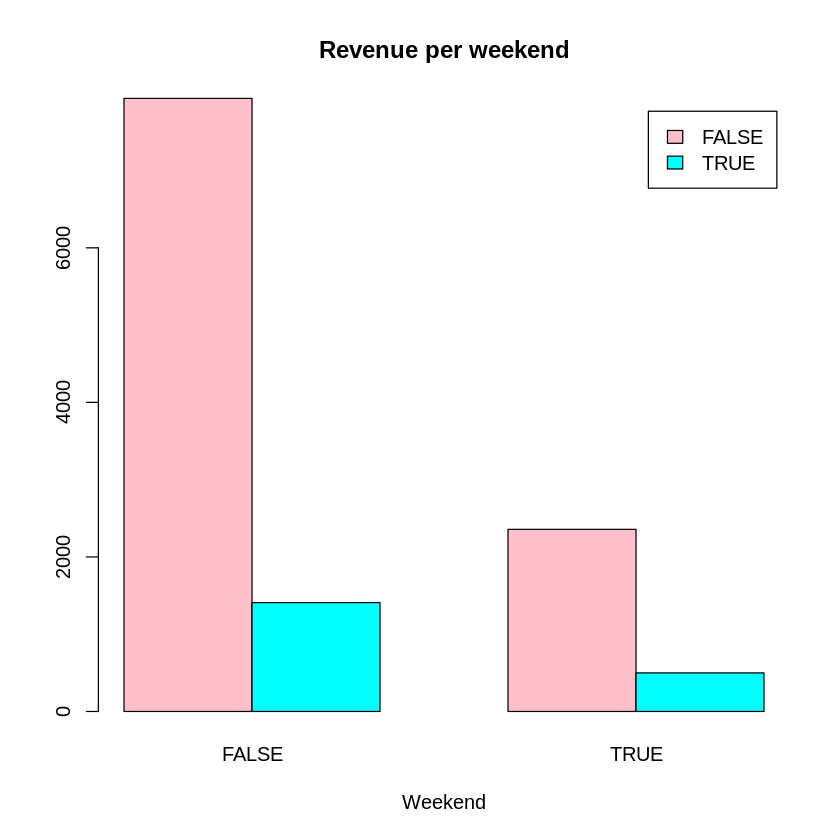

In [ ]:
#revenue vs Weekend
 rev_weekend<- table(data$Revenue, data$Weekend)
barplot(rev_weekend, main = "Revenue per weekend", col = c("pink", "cyan"), beside = TRUE, 
        legend = rownames(rev_weekend), xlab = "Weekend")

Most revenue was earned during weekday.

In [ ]:
#installing the necessary packages and the libraries.
install.packages("corrplot")
#Import our corrplot library.
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.84 loaded



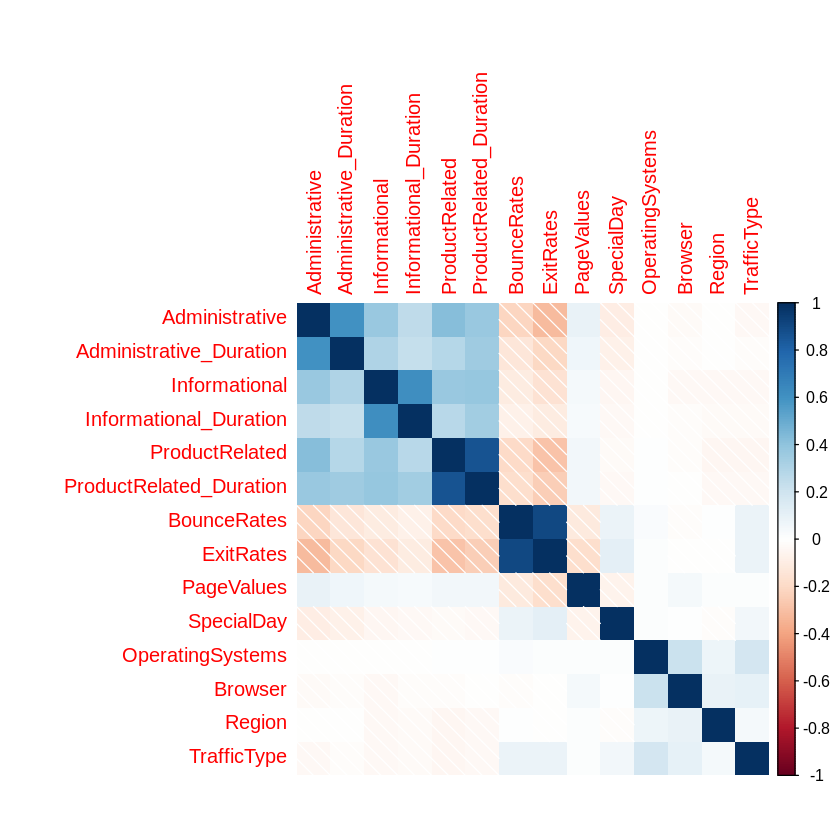

In [ ]:
#getting the numeric values of our dataaset
data2 = data[, sapply(data, is.numeric)]
#plotting the numeric values
corrplot(cor(data2), method = 'shade')

In [ ]:
#Check the correlation of the numeric
cor(data2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000000,0.600409653,0.37528761,0.254786021,0.428191515,0.371027224,-0.213666635,-0.311274132,0.09692097,-0.097072098,-0.006697922,-0.025763658,-0.007262053,-0.03478413
Administrative_Duration,0.600409653,1.000000000,0.30143630,0.237189860,0.286783914,0.353513793,-0.137333397,-0.202024452,0.06616837,-0.074736885,-0.007610715,-0.015833675,-0.006723711,-0.01507502
Informational,0.375287611,0.301436296,1.00000000,0.618677947,0.372604721,0.386083717,-0.109505298,-0.159566815,0.04739015,-0.049376774,-0.009625870,-0.038766808,-0.030477323,-0.03518669
Informational_Duration,0.254786021,0.237189860,0.61867795,1.000000000,0.279061948,0.346580691,-0.070159472,-0.102932678,0.03006416,-0.031293040,-0.009749983,-0.019609349,-0.027920098,-0.02516357
ProductRelated,0.428191515,0.286783914,0.37260472,0.279061948,1.000000000,0.860308186,-0.193515772,-0.286163211,0.05411549,-0.025930622,0.004090351,-0.013706213,-0.040106501,-0.04434433
ProductRelated_Duration,0.371027224,0.353513793,0.38608372,0.346580691,0.860308186,1.000000000,-0.174375499,-0.245334012,0.05084062,-0.038210652,0.002775788,-0.007838332,-0.034862498,-0.03750694
BounceRates,-0.213666635,-0.137333397,-0.10950530,-0.070159472,-0.193515772,-0.174375499,1.000000000,0.903358192,-0.11599198,0.087839995,0.026839839,-0.016018380,0.001432015,0.08919904
ExitRates,-0.311274132,-0.202024452,-0.15956681,-0.102932678,-0.286163211,-0.245334012,0.903358192,1.000000000,-0.17357154,0.116783762,0.016482012,-0.003565541,-0.001837556,0.08738623
PageValues,0.096920968,0.066168365,0.04739015,0.030064160,0.054115494,0.050840624,-0.115991977,-0.173571542,1.00000000,-0.064532709,0.018583782,0.045845065,0.010590868,0.01223694
SpecialDay,-0.097072098,-0.074736885,-0.04937677,-0.031293040,-0.025930622,-0.038210652,0.087839995,0.116783762,-0.06453271,1.000000000,0.012757766,0.003465984,-0.016452464,0.05282794


Variables have a relation of 1 along the diagonal as we expected.

Most of the variables are weakly related, they have a correlation less than 0.5

Some of the variables are inversely related,administrative to special day,browser,operating sytem,region and traffic type.

MODELLING

UNSUPERVISED LEARNING.

K-MEANS CLUSTERING

In [ ]:
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice



In [ ]:
# One hot encoding of the factor variables.
dmy <- dummyVars(" ~ .", data = data, fullRank = T)
df1 <- data.frame(predict(dmy, newdata = data))

head(df1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month.Oct,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.Other,VisitorType.Returning_Visitor,WeekendTRUE,RevenueTRUE
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,⋯,0,0,1,1,1,1,0,1,0,0
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,⋯,0,0,2,2,1,2,0,1,0,0
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,⋯,0,0,4,1,9,3,0,1,0,0
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,⋯,0,0,3,2,2,4,0,1,0,0
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,⋯,0,0,3,3,1,4,0,1,1,0
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,⋯,0,0,2,2,1,3,0,1,0,0


In [ ]:
# Checking the data types of each attribute
sapply(df, class)

Administrative       Administrative_Duration 
                    "numeric"                     "numeric" 
                Informational        Informational_Duration 
                    "numeric"                     "numeric" 
               ProductRelated       ProductRelated_Duration 
                    "numeric"                     "numeric" 
                  BounceRates                     ExitRates 
                    "numeric"                     "numeric" 
                   PageValues                    SpecialDay 
                    "numeric"                     "numeric" 
                    Month.Dec                     Month.Feb 
                    "numeric"                     "numeric" 
                    Month.Jul                    Month.June 
                    "numeric"                     "numeric" 
                    Month.Mar                     Month.May 
                    "numeric"                     "numeric" 
                    Month.Nov                     Month.Oct 
                    "numeric"                     "numeric" 
                    Month.Sep              OperatingSystems 
                    "numeric"                     "numeric" 
                      Browser                        Region 
                    "numeric"                     "numeric" 
                  TrafficType             VisitorType.Other 
                    "numeric"                     "numeric" 
VisitorType.Returning_Visitor                   WeekendTRUE 
                    "numeric"                     "numeric"

In [ ]:
#We are using Revenue as our label, we will store it in a different dataframe.
df3<- df[, -c(30:31)]
data.class<- data[, "Revenue"]

In [ ]:
#we normalize/scale data
#this is to ensure that no attribute has more effect on the cluster than the other.
df4 <- as.data.frame(apply(df3, 2, function(x) (x - min(x))/(max(x)-min(x))))

In [ ]:
#we can look at how our data looks
summary(df4)

 Administrative    Administrative_Duration Informational   
 Min.   :0.00000   Min.   :0.0000000       Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0002941       1st Qu.:0.0000  
 Median :0.03704   Median :0.0029414       Median :0.0000  
 Mean   :0.08667   Mean   :0.0243201       Mean   :0.0212  
 3rd Qu.:0.14815   3rd Qu.:0.0281638       3rd Qu.:0.0000  
 Max.   :1.00000   Max.   :1.0000000       Max.   :1.0000  
 Informational_Duration ProductRelated    ProductRelated_Duration
 Min.   :0.0000000      Min.   :0.00000   Min.   :0.000000       
 1st Qu.:0.0003921      1st Qu.:0.01135   1st Qu.:0.003042       
 Median :0.0003921      Median :0.02553   Median :0.009543       
 Mean   :0.0140518      Mean   :0.04547   Mean   :0.018891       
 3rd Qu.:0.0003921      3rd Qu.:0.05390   3rd Qu.:0.023112       
 Max.   :1.0000000      Max.   :1.00000   Max.   :1.000000       
  BounceRates        ExitRates         PageValues        SpecialDay     
 Min.   :0.00000   Min.   :0.00000   Min.   :

  We have maximum as 1 and minimum as 0. we can now apply our k-means

In [ ]:

# Applying the K-means clustering algorithm with no. of centroids(k)=3 
result<- kmeans(df4,3) 

# Previewing the no. of records in each cluster
# 
result$size 

[1] 2792 2678 6729

In [ ]:
# Getting the value of cluster center datapoint value(3 centers for k=3)
result$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month.Nov,Month.Oct,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.Other,VisitorType.Returning_Visitor,WeekendTRUE
1,0.06904648,0.01952018,0.01652042,0.01011657,0.03711059,0.01505830,0.14080571,0.2538093,0.01363182,0.255372493,⋯,0.0000000,0.00000000,0.00000000,0.1623005,0.1162548,0.2656250,0.1857186,0.000000000,0.9133238,0.06375358
2,0.09469477,0.02657715,0.02526761,0.01708376,0.04733076,0.01943769,0.07533160,0.1718974,0.01835774,0.003659447,⋯,0.2953697,0.05377147,0.03584765,0.1615278,0.1031553,0.2674571,0.1589560,0.002613891,0.8215086,1.00000000
3,0.09078450,0.02541336,0.02152375,0.01447794,0.04820334,0.02026272,0.09693581,0.2024252,0.01686753,0.004933868,⋯,0.3257542,0.06018725,0.05231089,0.1595652,0.1158914,0.2713070,0.1530453,0.010997176,0.8433645,0.00000000


In [ ]:
# Getting the cluster vector that shows the cluster where each record falls
# ---
# 
result$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    3     3     3     3     2     3     3     2     3     3     3     3     3 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    3     3     3     3     2     3     3     2     3     3     3     2     3 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    3     3     3     3     3     2     3     3     3     3     2     3     3 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    3     3     3     3     3     3     3     3     3     3     3     2     3 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    2     3     3     3     3     3     3     3     3     3     3     2     3 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    2     3     2     3     3     3     2     3     3     3     3     3     3 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    2     3     3     3     3     3     3     3     3     3     2     3     3 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    3     3     3     3     3     3     3     3     3     3     3     2     3 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    2     3     3     3     3     3     3     3     3     3     3     3     3 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    3     3     3     3     3     3     3     3     3     3     3     3     2 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    2     2     3     3     2     2     3     3     3     3     3     3     2 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    2     3     3     2     2     3     3     3     3     2     3     3     2 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    3     3     3     2     3     3     3     3     3     3     2     3     3 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    3     3     2     2     2     3     3     3     3     3     2     3     3 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    3     3     3     2     3     3     3     3     3     3     3     3     3 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    3     3     2     3     3     3     3     2     3     2     2     2     3 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    2     2     2     3     3     3     3     2     3     3     3     3     3 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    2     2     3     3     3     2     3     3     3     3     3     2     3 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    2     3     3     2     3     3     3     2     2     3     3     3     2 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    3     2     3     3     3     2     2     3     3     3     3     3     3 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    3     3     3     3     3     2     3     3     3     3     3     3     2 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    2     3     3     3     3     2     3     3     2     3     2     3     3 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    3     3     3     3     3     3     3     3     3     3     3     3     3 
  328   329   330   331   332   333   334   335   336 

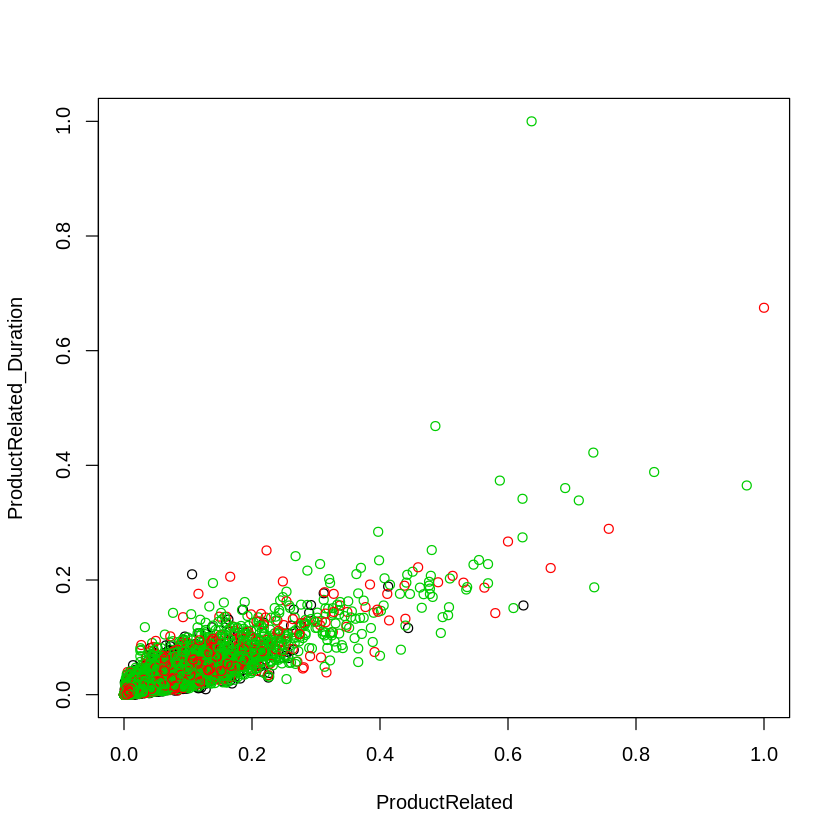

In [ ]:
# Plotting two variables to see how their data points 
# have been distributed in the cluster
# Product Related, vs Product Related Duration
plot(df4[, 5:6], col = result$cluster)

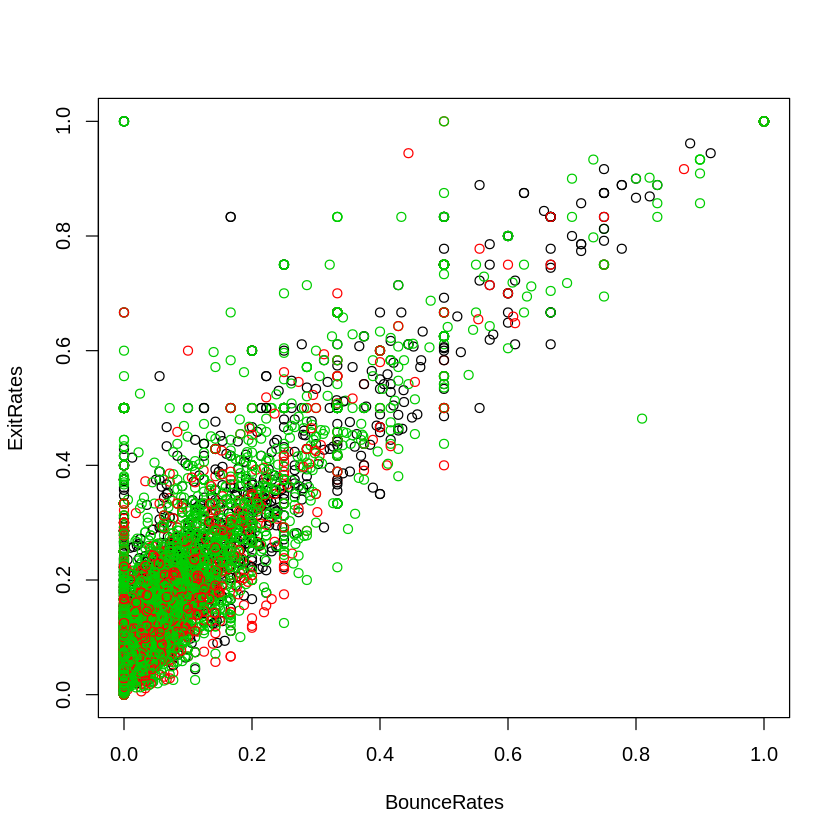

In [ ]:
plot(df4[, 7:8], col = result$cluster)

In [ ]:
#Showing how the classes corespond to the clusters
table(result$cluster, data.class)

   data.class
    FALSE TRUE
  1  2517  275
  2  2188  490
  3  5586 1143

Our model grouped a few variables correctly as seen above.Most of the variables were wrongly classified. we can try using a different value of k.

In [ ]:
#We can try different value of k=6
result1<- kmeans(df4,6) 

# Previewing the no. of records in each cluster
# 
result1$size

[1] 1626 5688 2546  361 1256  722

In [ ]:
# Getting the value of cluster center datapoint value(6centers for k=6)
result1$centers

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,⋯,Month.Nov,Month.Oct,Month.Sep,OperatingSystems,Browser,Region,TrafficType,VisitorType.Other,VisitorType.Returning_Visitor,WeekendTRUE
1,0.096442076,0.0263920908,0.0228577286,0.015420907,0.041156561,0.0163345539,0.049094880,0.15519802,0.01731771,0.09298893,⋯,0.0000000,0.08610086,0.05781058,0.1592866,0.1028598,0.2679889,0.1501586,0.000000000,0.8290283,1.0000000
2,0.085618847,0.0240428687,0.0209432138,0.014368515,0.044551177,0.0186752687,0.057639308,0.17901956,0.01336331,0.08730661,⋯,0.0000000,0.05555556,0.04553446,0.1573739,0.1146566,0.2684819,0.1492061,0.000000000,1.0000000,0.0000000
3,0.104303046,0.0288858149,0.0305217334,0.019906022,0.073197841,0.0309740510,0.051824966,0.15311901,0.01911275,0.00000000,⋯,1.0000000,0.00000000,0.00000000,0.1587925,0.1025137,0.2457286,0.1787737,0.000392773,0.9501178,0.3012569
4,0.077459731,0.0234045393,0.0193905817,0.010291355,0.035551364,0.0150898428,0.100112826,0.19804476,0.01517457,0.00000000,⋯,0.0000000,0.00000000,0.00000000,0.1697665,0.1082641,0.2936288,0.1145940,0.013850416,0.7894737,1.0000000
5,0.094774711,0.0275357615,0.0138004246,0.007920418,0.025930569,0.0102550530,0.009498333,0.09245281,0.03377029,0.02038217,⋯,0.2364650,0.06687898,0.06847134,0.1726570,0.1423832,0.3094148,0.1785954,0.050955414,0.0000000,0.0000000
6,0.001231148,0.0006009214,0.0004039705,0.000375807,0.003646294,0.0006538805,0.913366965,0.94601828,0.00000000,0.11440443,⋯,0.1939058,0.01246537,0.01246537,0.1701622,0.1140351,0.2775277,0.2221169,0.015235457,0.9487535,0.1412742


In [ ]:
# Getting the cluster vector that shows the cluster where each record falls
result1$cluster

1     2     3     4     5     6     7     8     9    10    11    12    13 
    6     2     6     2     1     2     6     6     2     2     2     2     2 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
    2     2     2     6     1     2     2     1     6     2     2     6     2 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
    2     2     2     2     2     1     2     2     2     2     1     2     2 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
    2     2     2     2     2     2     2     2     2     2     6     6     2 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    1     2     2     6     6     2     2     2     2     2     2     1     6 
   66    67    68    69    70    71    72    73    74    75    76    77    78 
    2     2     6     2     6     6     2     2     2     2     2     2     2 
   79    80    81    82    83    84    85    86    87    88    89    90    91 
    6     6     1     2     2     2     6     6     2     2     2     2     2 
   92    93    94    95    96    97    98    99   100   101   102   103   104 
    6     2     5     2     2     2     2     2     2     2     1     2     2 
  105   106   107   108   109   110   111   112   113   114   115   116   117 
    2     6     2     2     2     2     2     6     6     2     2     1     2 
  118   119   120   121   122   123   124   125   126   127   128   129   130 
    2     2     2     2     2     2     2     2     6     2     2     2     6 
  131   132   133   134   135   136   137   138   139   140   141   142   143 
    1     2     6     2     2     2     2     2     2     2     6     2     2 
  144   145   146   147   148   149   150   151   152   153   154   155   156 
    6     2     2     2     2     2     2     2     6     6     2     2     1 
  157   158   160   161   162   163   164   165   166   167   168   169   170 
    6     1     6     2     1     1     2     2     2     2     6     2     1 
  171   172   173   174   175   176   177   178   180   181   182   183   184 
    1     2     2     6     1     2     2     2     2     1     6     6     1 
  185   186   187   188   189   190   191   192   193   194   195   196   197 
    2     2     2     1     2     2     6     2     2     2     1     2     5 
  198   199   200   201   202   203   204   205   206   207   208   209   210 
    2     5     1     1     1     5     2     2     5     5     1     5     2 
  211   212   213   214   215   216   217   218   219   220   221   222   223 
    2     2     2     1     2     2     2     2     2     2     2     2     6 
  224   225   226   227   228   229   230   231   232   233   234   235   236 
    5     2     1     2     2     2     2     1     2     1     1     1     2 
  237   238   239   240   241   242   243   244   245   246   247   248   249 
    1     1     1     2     2     2     2     1     2     2     2     2     2 
  250   251   252   253   254   255   256   257   258   259   260   261   262 
    1     1     2     6     2     1     2     2     2     2     5     1     6 
  263   264   265   266   267   268   269   270   271   272   273   274   275 
    1     2     2     1     2     2     2     1     1     6     5     2     1 
  276   277   278   279   280   281   282   283   284   285   286   287   288 
    2     1     2     2     2     1     1     2     2     2     2     6     2 
  289   290   291   292   293   294   295   296   297   298   299   300   301 
    2     2     2     2     2     6     2     2     2     2     6     2     1 
  302   303   304   305   306   307   308   309   310   311   312   313   314 
    1     6     2     2     2     1     2     2     1     2     1     2     2 
  315   316   317   318   319   320   321   322   323   324   325   326   327 
    2     2     2     2     2     2     2     2     2     5     2     2     5 
  328   329   330   331   332   333   334   335   336 

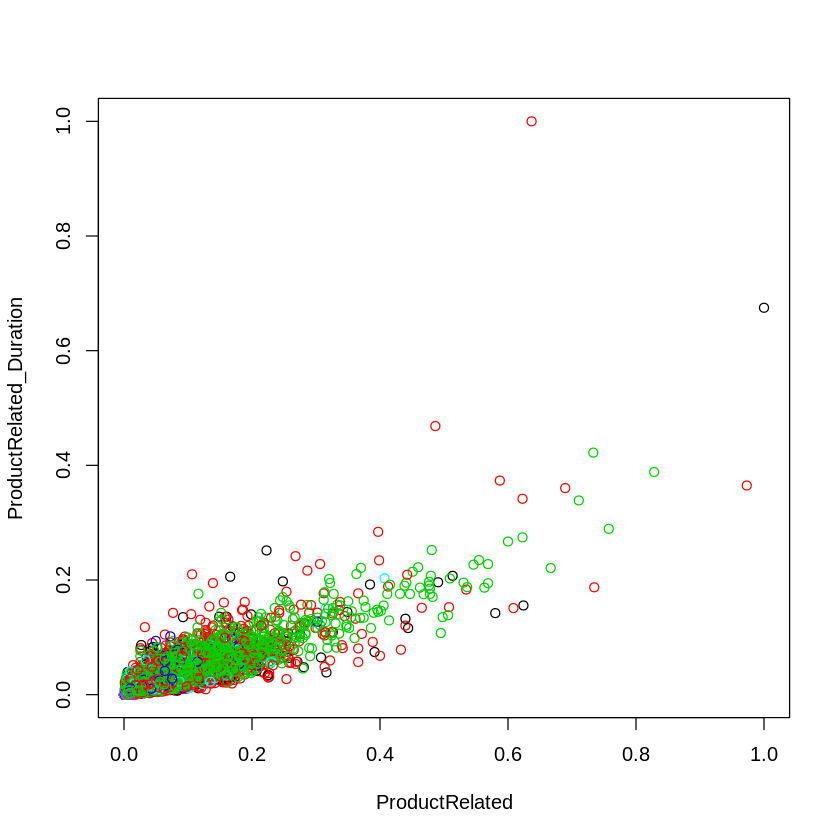

In [ ]:
# Plotting two variables to see how their data points 
# have been distributed in the cluster
# Product Related, vs Product Related Duration
plot(df4[, 5:6], col = result1$cluster)

In [ ]:
#Showing how the classes corespond to the clusters
table(result1$cluster, data.class)

   data.class
    FALSE TRUE
  1  1376  250
  2  5068  620
  3  1882  664
  4   322   39
  5   924  332
  6   719    3

An increase in k caused a decrease in the number of variables classified as TRUE .

##Hierarchical Clustering

In [ ]:
# We  use the R function hclust() for hierarchical clustering
#  we use the dist() function to compute the Euclidean distance between observations, 
# d is the first argument in the hclust() function dissimilarity matrix
d <- dist(df4, method = "euclidean")
# We then hierarchical clustering using the Ward's method
res.hc <- hclust(d, method = "ward.D2" )

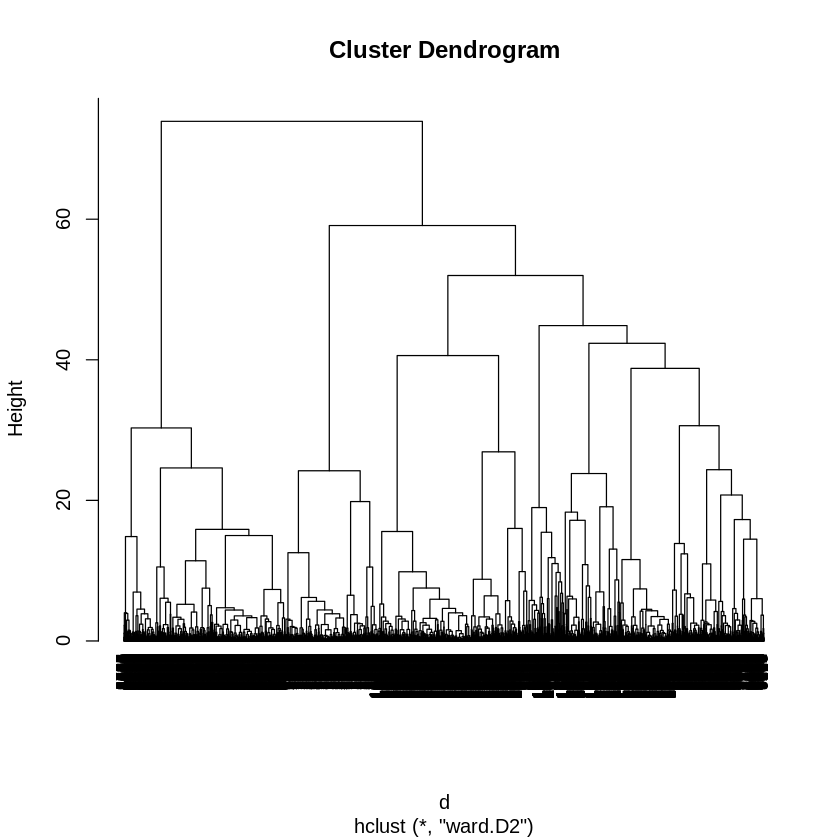

In [ ]:
# Lastly, we plot the obtained dendrogram
# ---
# 
plot(res.hc, cex = 0.8, hang = -1)

Our dendrogram does not look that pleasant, we can try a different method.

In [ ]:
#we can use a different method

# We then hierarchical clustering using the Ward's method
# ---
# 
res.hc <- hclust(d, method = "single" )

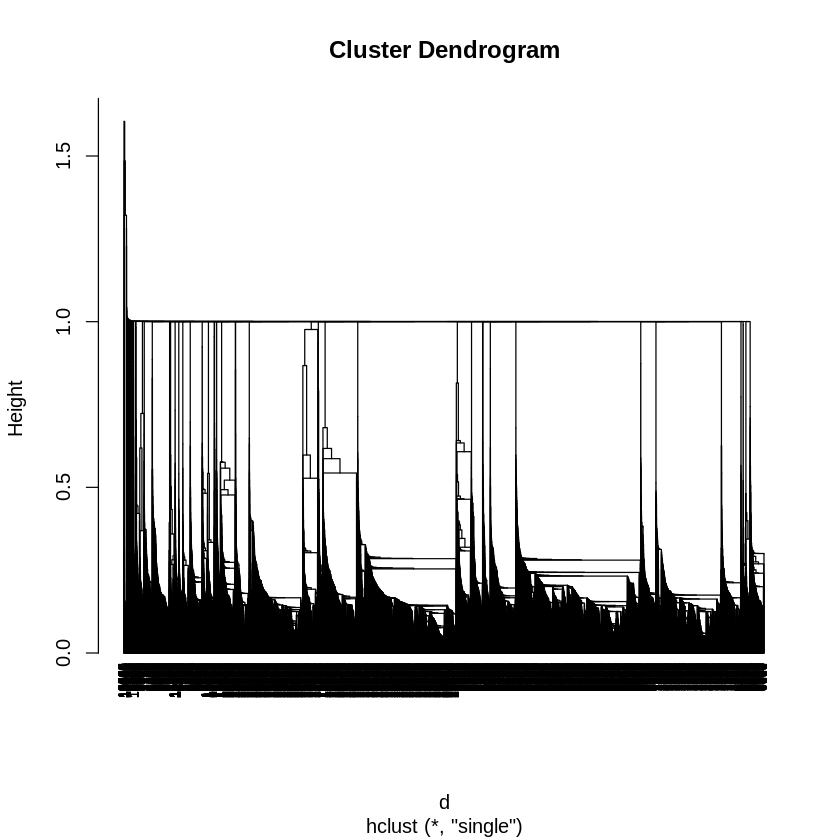

In [ ]:
#  we plot the obtained dendrogram
plot(res.hc, cex = 0.6, hang = -1)

The visual got worse, more blurred.

In [ ]:
#Try another method to see if the visualisation gets better
# 
res.hc <- hclust(d, method = "ward.D" )

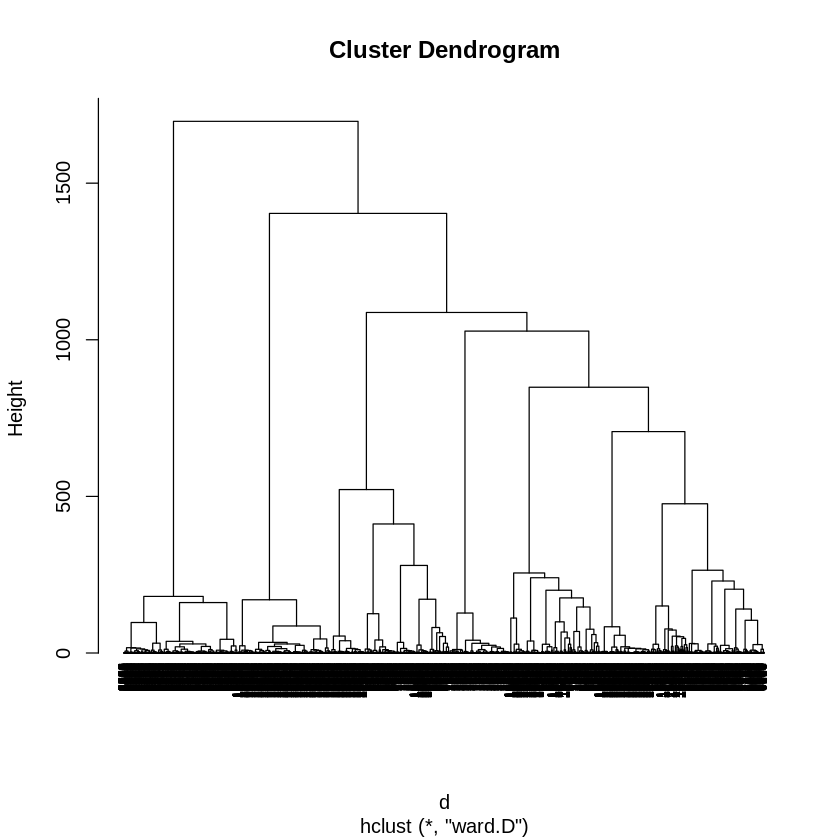

In [ ]:
#Plot the dendogram
plot(res.hc, cex = 0.6, hang = -1)


Since our dendrogram are not improving, we can try visualising using a cladogram.

In [ ]:
# load package ape;
# remember to install it:
install.packages("ape")
library(ape)

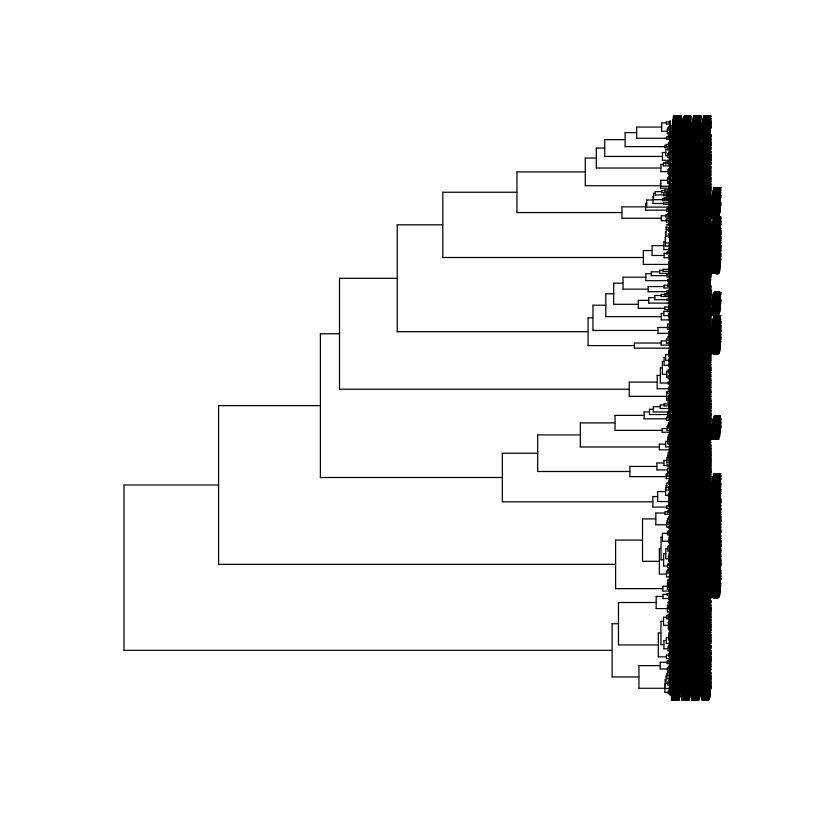

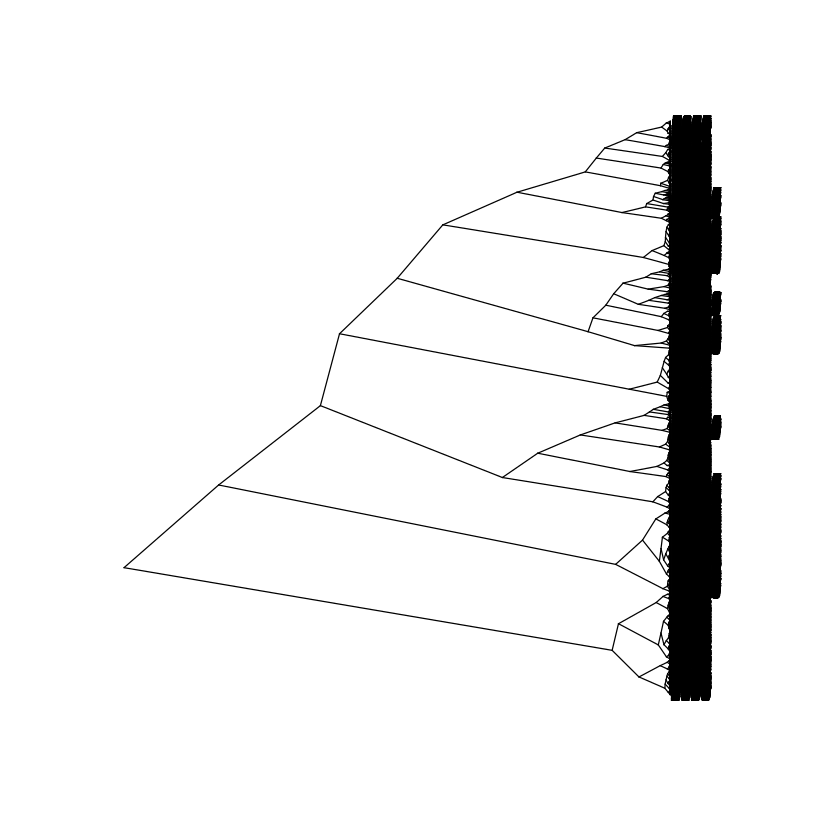

In [ ]:
# plot basic tree
plot(as.phylo(res.hc), cex = 0.9, label.offset = 1)
# cladogram
plot(as.phylo(res.hc), type="cladogram", cex = 0.9, label.offset = 1)

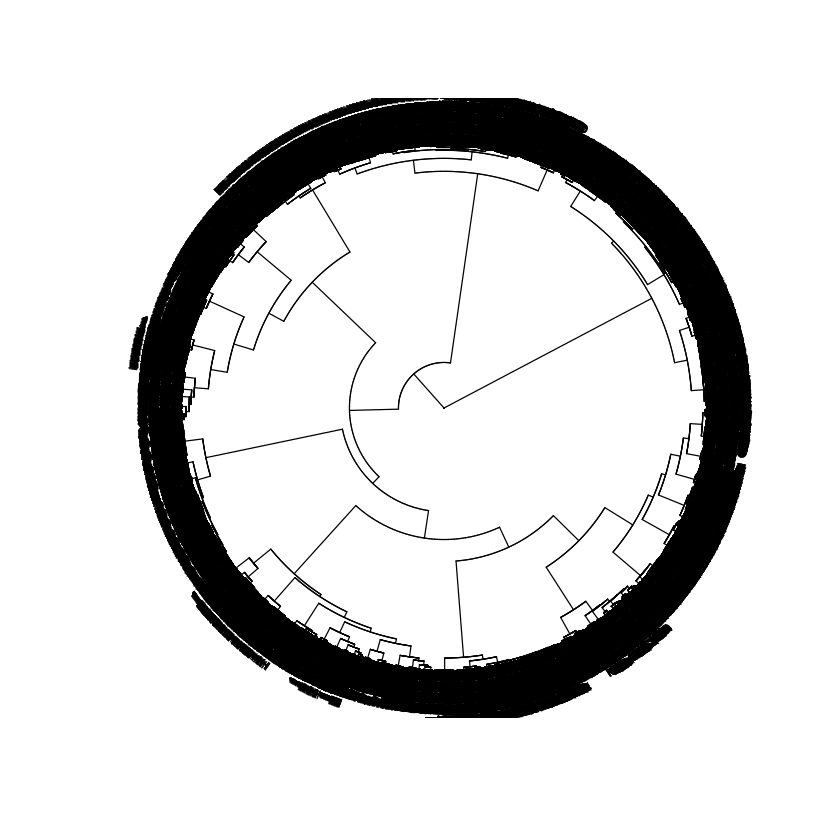

In [ ]:
# fan
plot(as.phylo(res.hc), type = "fan")

Conclusion.

Generally our analysis was a success, we were able to uncover insights from our data.

>Most customers visit the site on weekdays.

>Frequent customers visit the site oftenly, new customers/visitors were less.

>November is the month that brought in most revenue, month of may had the most customers but came second in terms of revenue.

>Region 2 earned most revenue.

> Our models performed fairly well but they were not accurate.



##Challenging the solution and Recommendations


The data provided had small number of revenue earned ,the target variable should have atleast had 50-50 revene and no revenue.

The enterpreneur should look at maximizing during the peaks months i.e november to maximize on the revenue.

Returning visitors are high, this shows satisfactory, they should look for better ways to keep them coming more and more and to maintain loyalty such as use of vouchers.

They should also ensure they are stocked on weekdays to avoid unsatisfied customers since they visit the site more on weekdays.


##Follow up questions

1. Can we get better classifications using supervised algorithms?.